<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Hydrofoil_abril_07_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [4]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")

In [5]:
df.head(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [6]:
df.tail(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [7]:
# separa as colunas de interesse (filtrar)
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()

In [8]:
Dat_Select.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [9]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [10]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [11]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [12]:
DAT.tail(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,1.0,0.728608,0.458333,0.883962,0.180864,0.260444
57,1.0,0.797753,0.546875,0.884836,0.171315,0.390449
58,1.0,0.866897,0.520833,1.000000,0.190414,0.419620


In [13]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)

In [14]:
train.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
46,1.0,-0.827139,-0.940104,-0.904906,-0.446866,-0.994823
47,1.0,-0.654278,-0.619792,-0.967466,-0.156350,-0.934277
12,-1.0,0.382887,0.395833,0.444609,1.000000,-0.034860


In [15]:
test.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
4,-1.0,-0.844425,-0.956354,-0.924482,-0.449160,-0.996605
7,-1.0,-0.481417,-0.311979,-0.711975,0.761513,-0.821602
8,-1.0,-0.308557,-0.183333,-0.432939,0.709855,-0.717661


In [16]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [17]:
# obtem a dependente potência (treino e teste)
Index=[5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [18]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',alpha=1e-5,max_iter=100,
                     hidden_layer_sizes=(9, 8),random_state=1)

In [19]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [20]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [21]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [22]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [23]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [24]:
train

,Power
46,8.412615
47,106.803628
12,1568.403965
48,303.951421
6,99.927230
27,2265.619513
37,826.045596
14,2129.825283
20,306.146017
2,1.624000


In [25]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()

In [26]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()

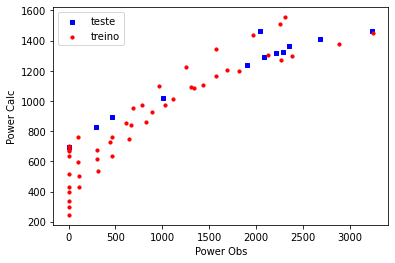

In [27]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [28]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 820852.2901960985
R^2 teste= 0.14813528084083682


In [29]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 332669.356683624
R^2 treino= 0.5720501158089005
